# Import Required Libraries

In [222]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Read the dataset

In [223]:
data = pd.read_csv('train_ctrUa4K.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [224]:
print('Column Names',data.columns)

Column Names Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


# Label encode the target variable

In [225]:
#label encode the target variable
encode = LabelEncoder()
data.Loan_Status = encode.fit_transform(data.Loan_Status)
data.shape

(614, 13)

In [226]:
# drop the null values
data.dropna(how='any',inplace=True)
data.shape

(480, 13)

In [227]:
data = data.drop(columns=['Loan_ID'],axis=1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


# Find Independent Variable (Feature)

In [228]:
X=data.iloc[:,:-1]
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban


# Find dependent Variable (Target)

In [229]:
y=data.iloc[:,-1]
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int32

# Split dataset into train and test dataset

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((321, 11), (159, 11), (321,), (159,))

In [231]:
# encode the data
X_train = pd.get_dummies(X_train)
X_test  = pd.get_dummies(X_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
features=X_train.columns

# Apply Standard Scaling to scale data on same scale

In [232]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Train the System to get model

In [233]:
model = LogisticRegression(solver="lbfgs",multi_class='auto')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [234]:
print('Predicted Values on Test Data',encode.inverse_transform(y_pred))

Predicted Values on Test Data ['Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']


# Accuracy on test dataset

In [235]:
print('Accuracy Score on test data',accuracy_score(y_test,y_pred)*100)

Accuracy Score on test data 80.50314465408806


# Cross validation on Train dataset

In [236]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(model, X=X_train, y=y_train, cv=5)
print("10-fold Cross Validation on Train Dataset,Accuracy is ",accuracies.mean()*100)

10-fold Cross Validation on Train Dataset,Accuracy is  80.67788461538463


# Cross validation on Test dataset

In [237]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(model, X=X_test, y=y_test, cv=5)
print("10-fold Cross Validation on Test Dataset,Accuracy is ",accuracies.mean()*100)

10-fold Cross Validation on Test Dataset,Accuracy is  77.92766373411536


In [238]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
from sklearn.metrics import classification_report
print("Classification Report\n",classification_report(y_test, y_pred,))

Confusion Matrix
 [[ 16  31]
 [  0 112]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.34      0.51        47
           1       0.78      1.00      0.88       112

    accuracy                           0.81       159
   macro avg       0.89      0.67      0.69       159
weighted avg       0.85      0.81      0.77       159



# Decision Tree Classification

In [239]:
from sklearn.tree import DecisionTreeClassifier
DT_model=DecisionTreeClassifier()
#classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DT_model.fit(X_train, y_train)
#print(classifier)
# Predicting the Test set results
y_pred = DT_model.predict(X_test)
print('Accuracy Score on test data',accuracy_score(y_test,predict))
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(DT_model, X=X_train, y=y_train, cv=5)
print("10-fold Cross Validation on Train Dataset,Accuracy is ",accuracies.mean()*100)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(DT_model, X=X_test, y=y_test, cv=5)
print("10-fold Cross Validation on Test Dataset,Accuracy is ",accuracies.mean()*100)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
from sklearn.metrics import classification_report
print("Classification Report\n",classification_report(y_test, y_pred,))

Accuracy Score on test data 0.8050314465408805
10-fold Cross Validation on Train Dataset,Accuracy is  72.57211538461539
10-fold Cross Validation on Test Dataset,Accuracy is  73.0400782013685
Confusion Matrix
 [[24 23]
 [28 84]]
Classification Report
               precision    recall  f1-score   support

           0       0.46      0.51      0.48        47
           1       0.79      0.75      0.77       112

    accuracy                           0.68       159
   macro avg       0.62      0.63      0.63       159
weighted avg       0.69      0.68      0.68       159



# Random Forest Classification

In [240]:
#Random Forest Classification
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
print('Accuracy Score on test data',accuracy_score(y_test,predict))
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(RF_model, X=X_train, y=y_train, cv=5)
print("10-fold Cross Validation on Train Dataset,Accuracy is ",accuracies.mean()*100)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(RF_model, X=X_test, y=y_test, cv=5)
print("10-fold Cross Validation on Test Dataset,Accuracy is ",accuracies.mean()*100)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
from sklearn.metrics import classification_report
print("Classification Report\n",classification_report(y_test, y_pred,))

Accuracy Score on test data 0.8050314465408805
10-fold Cross Validation on Train Dataset,Accuracy is  74.46153846153847
10-fold Cross Validation on Test Dataset,Accuracy is  76.07038123167156
Confusion Matrix
 [[ 24  23]
 [ 10 102]]
Classification Report
               precision    recall  f1-score   support

           0       0.71      0.51      0.59        47
           1       0.82      0.91      0.86       112

    accuracy                           0.79       159
   macro avg       0.76      0.71      0.73       159
weighted avg       0.78      0.79      0.78       159



In [241]:
# Feature Importance
imp=RF_model.feature_importances_
print(imp)

[0.20507082 0.09992227 0.17644465 0.04623447 0.18399374 0.02108987
 0.0158878  0.01501843 0.01504618 0.02314526 0.02296242 0.02337007
 0.01731937 0.01642793 0.01625242 0.01675994 0.01598715 0.01953122
 0.03117432 0.01836167]


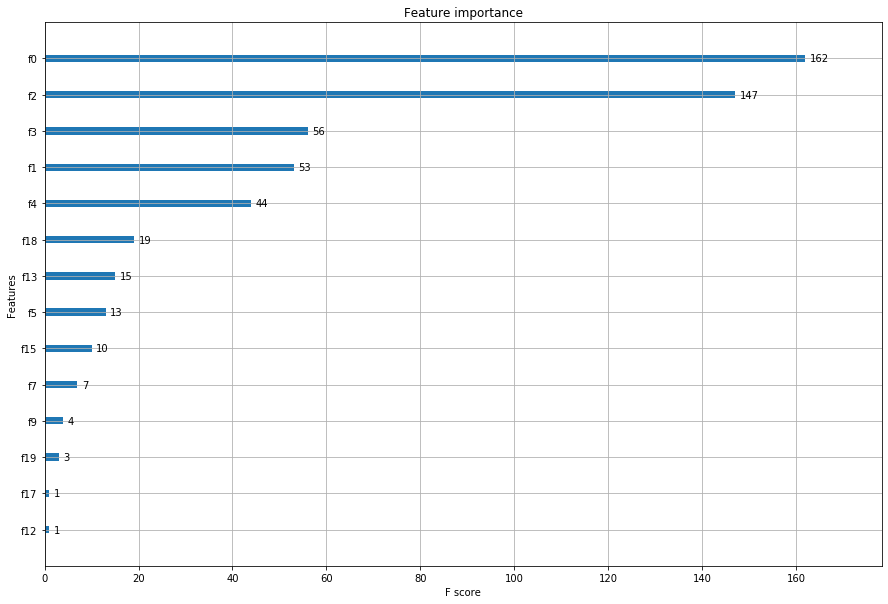

In [242]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# load data
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# plot feature importance
plot_importance(model)
pyplot.show()

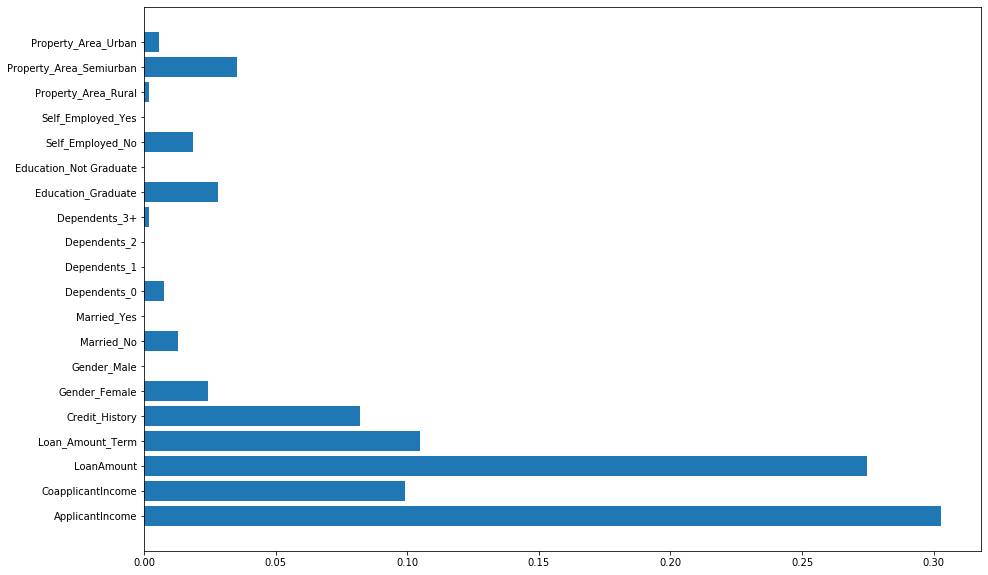

In [243]:
model = XGBClassifier()
model.fit(X_train, y_train)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
# feature importance
#print(model.feature_importances_)
# plot features
#pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.barh(features, model.feature_importances_)
pyplot.show()

# Support Vector Machine

In [244]:
from sklearn.svm import SVC
SVM_model = SVC(kernel='rbf',gamma='auto')
SVM_model.fit(X_train, y_train)
# Predicting the Test set results
y_pred = SVM_model.predict(X_test)
print('Accuracy Score on test data',accuracy_score(y_test,predict))
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(SVM_model, X=X_train, y=y_train, cv=5)
print("10-fold Cross Validation on Train Dataset,Accuracy is ",accuracies.mean()*100)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(SVM_model, X=X_test, y=y_test, cv=5)
print("10-fold Cross Validation on Test Dataset,Accuracy is ",accuracies.mean()*100)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
from sklearn.metrics import classification_report
print("Classification Report\n",classification_report(y_test, y_pred,))

Accuracy Score on test data 0.8050314465408805
10-fold Cross Validation on Train Dataset,Accuracy is  80.375
10-fold Cross Validation on Test Dataset,Accuracy is  78.57282502443793
Confusion Matrix
 [[ 15  32]
 [  0 112]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.32      0.48        47
           1       0.78      1.00      0.88       112

    accuracy                           0.80       159
   macro avg       0.89      0.66      0.68       159
weighted avg       0.84      0.80      0.76       159



# Naive Base Classifier

In [245]:
from sklearn.naive_bayes import GaussianNB
NB_model= GaussianNB()
NB_model.fit(X_train, y_train)
# Predicting the Test set results
y_pred = NB_model.predict(X_test)
print('Accuracy Score on test data',accuracy_score(y_test,predict))
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(NB_model, X=X_train, y=y_train, cv=5)
print("10-fold Cross Validation on Train Dataset,Accuracy is ",accuracies.mean()*100)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(NB_model, X=X_test, y=y_test, cv=5)
print("10-fold Cross Validation on Test Dataset,Accuracy is ",accuracies.mean()*100)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
from sklearn.metrics import classification_report
print("Classification Report\n",classification_report(y_test, y_pred,))

Accuracy Score on test data 0.8050314465408805
10-fold Cross Validation on Train Dataset,Accuracy is  77.8798076923077
10-fold Cross Validation on Test Dataset,Accuracy is  79.78494623655914
Confusion Matrix
 [[ 18  29]
 [  3 109]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.38      0.53        47
           1       0.79      0.97      0.87       112

    accuracy                           0.80       159
   macro avg       0.82      0.68      0.70       159
weighted avg       0.81      0.80      0.77       159



# KNN Classification

In [246]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(metric='minkowski', p=2)
KNN_model.fit(X_train, y_train)
# Predicting the Test set results
y_pred = KNN_model.predict(X_test)
print('Accuracy Score on test data',accuracy_score(y_test,predict))
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(KNN_model, X=X_train, y=y_train, cv=5)
print("10-fold Cross Validation on Train Dataset,Accuracy is ",accuracies.mean()*100)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(KNN_model, X=X_test, y=y_test, cv=5)
print("10-fold Cross Validation on Test Dataset,Accuracy is ",accuracies.mean()*100)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
from sklearn.metrics import classification_report
print("Classification Report\n",classification_report(y_test, y_pred,))

Accuracy Score on test data 0.8050314465408805
10-fold Cross Validation on Train Dataset,Accuracy is  67.91346153846153
10-fold Cross Validation on Test Dataset,Accuracy is  71.67155425219943
Confusion Matrix
 [[  7  40]
 [  3 109]]
Classification Report
               precision    recall  f1-score   support

           0       0.70      0.15      0.25        47
           1       0.73      0.97      0.84       112

    accuracy                           0.73       159
   macro avg       0.72      0.56      0.54       159
weighted avg       0.72      0.73      0.66       159



# AdaBoost Algorithm

In [247]:
from sklearn.ensemble import AdaBoostClassifier
AB_model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
AB_model.fit(X_train,y_train)
y_pred=AB_model.predict(X_test)
print('Accuracy Score on test data',accuracy_score(y_test,predict)*100)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(AB_model, X=X_train, y=y_train, cv=5)
print("10-fold Cross Validation on Train Dataset,Accuracy is ",accuracies.mean()*100)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(AB_model, X=X_test, y=y_test, cv=5)
print("10-fold Cross Validation on Test Dataset,Accuracy is ",accuracies.mean()*100)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
from sklearn.metrics import classification_report
print("Classification Report\n",classification_report(y_test, y_pred,))

Accuracy Score on test data 80.50314465408806
10-fold Cross Validation on Train Dataset,Accuracy is  75.08653846153847
10-fold Cross Validation on Test Dataset,Accuracy is  75.5425219941349
Confusion Matrix
 [[ 18  29]
 [  6 106]]
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.38      0.51        47
           1       0.79      0.95      0.86       112

    accuracy                           0.78       159
   macro avg       0.77      0.66      0.68       159
weighted avg       0.77      0.78      0.75       159



# Gradient Boosting Classification

In [248]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier(n_estimators=30)
GB_model.fit(X_train, y_train)
# Predicting the Test set results
y_pred = GB_model.predict(X_test)
print('Accuracy Score on test data',accuracy_score(y_test,predict)*100)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(GB_model, X=X_train, y=y_train, cv=5)
print("10-fold Cross Validation on Train Dataset,Accuracy is ",accuracies.mean()*100)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(GB_model, X=X_test, y=y_test, cv=5)
print("10-fold Cross Validation on Test Dataset,Accuracy is ",accuracies.mean()*100)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
from sklearn.metrics import classification_report
print("Classification Report\n",classification_report(y_test, y_pred,))

Accuracy Score on test data 80.50314465408806
10-fold Cross Validation on Train Dataset,Accuracy is  79.7451923076923
10-fold Cross Validation on Test Dataset,Accuracy is  77.28250244379277
Confusion Matrix
 [[ 14  33]
 [  2 110]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.30      0.44        47
           1       0.77      0.98      0.86       112

    accuracy                           0.78       159
   macro avg       0.82      0.64      0.65       159
weighted avg       0.80      0.78      0.74       159



# XGB Classification

In [249]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier(n_estimators=30)
XGB_model.fit(X_train, y_train)
# Predicting the Test set results
y_pred = XGB_model.predict(X_test)
print('Accuracy Score on test data',accuracy_score(y_test,predict)*100)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(XGB_model, X=X_train, y=y_train, cv=5)
print("10-fold Cross Validation on Train Dataset,Accuracy is ",accuracies.mean()*100)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(XGB_model, X=X_test, y=y_test, cv=5)
print("10-fold Cross Validation on Test Dataset,Accuracy is ",accuracies.mean()*100)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
from sklearn.metrics import classification_report
print("Classification Report\n",classification_report(y_test, y_pred,))

Accuracy Score on test data 80.50314465408806
10-fold Cross Validation on Train Dataset,Accuracy is  80.0576923076923
10-fold Cross Validation on Test Dataset,Accuracy is  78.49462365591397
Confusion Matrix
 [[ 15  32]
 [  1 111]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.32      0.48        47
           1       0.78      0.99      0.87       112

    accuracy                           0.79       159
   macro avg       0.86      0.66      0.67       159
weighted avg       0.82      0.79      0.75       159



<Figure size 720x504 with 0 Axes>

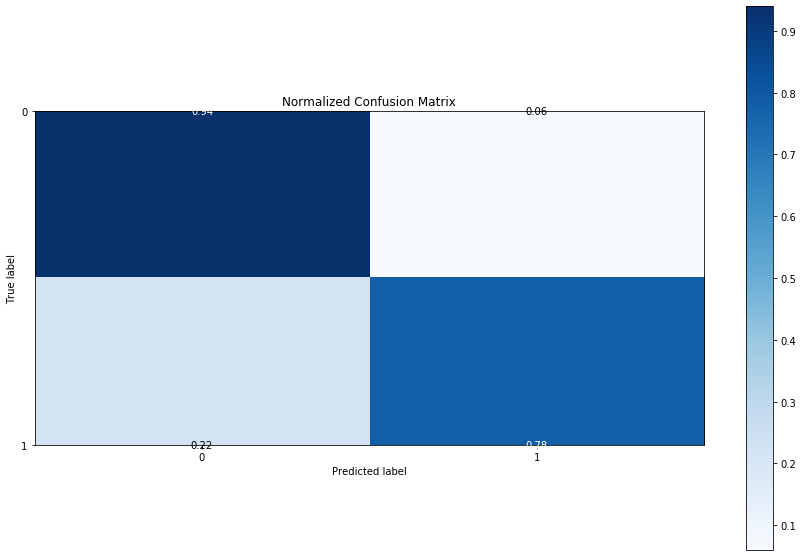

In [250]:
import scikitplot as skplt
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
skplt.metrics.plot_confusion_matrix(y_pred, y_test, normalize=True)
plt.show()

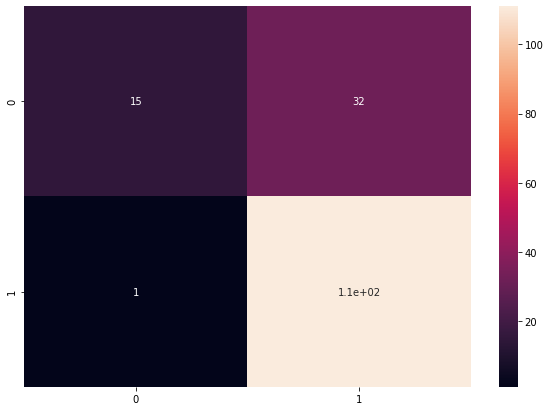

In [251]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.show()